In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import time

In [19]:
#Implementing Jacobi Method
def Jacobi(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        temp=x.copy()
        for j in range(0,n):
            x[j,0]=(1/A[j,j])*(b[j,0]-A[j,:]@temp+A[j,j]*temp[j,0])
        if(np.linalg.norm(b-A@x)/np.linalg.norm(b)<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % np.linalg.norm(b-A@x)/np.linalg.norm(b),end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,np.linalg.norm(b-A@x)/np.linalg.norm(b)

#Implementing Gauss-Seidel Method
def GaussSeidel(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        for j in range(0,n):
            x[j,0]=(1/A[j,j])*(b[j,0]-A[j,:]@x+A[j,j]*x[j,0])
        temp=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(temp<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing SOR Method
def SOR(A,b,x0,w,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        for j in range(0,n):
            temp=(1/A[j,j])*(b[j,0]-A[j,:]@x+A[j,j]*x[j,0])
            x[j,0]=w*temp+(1-w)*x[j,0]
        tempr=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(tempr<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % tempr,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % tempr,end="")
    return x,i+1,tempr

#Implementing Steepest Descent Method
def SD(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    for i in range(0,numiter):
        r=b-A@x
        alpha=(r.T@r)/(r.T@A@r)
        x=x+alpha*r
        temp=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(temp<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing Conjugate Gradient Method
def CG(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    r=b-A@x
    p=r.copy()
    for i in range(0,numiter):
        alpha=(r.T@r)/(p.T@A@p)
        x=x+alpha*p
        rnew=r-alpha*A@p
        beta=(rnew.T@rnew)/(r.T@r)
        p=rnew+beta*p
        r=rnew
        temp=np.linalg.norm(b-A@x)/np.linalg.norm(b)
        if(temp<tol):
            break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing Conjugate Gradient Method with Preconditioning: Incomplete Cholesky
def CG_IC(A,b,x0,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    r=b-A@x
    L=sp.linalg.cholesky(A)
    for i in range(0,n):
        for j in range(0,i):
            if(A[i,j]==0):L[i,j]=0
    z=np.linalg.solve(L,r)
    p=z
    for i in range(0,numiter):
        alpha=(z.T@r)/(p.T@A@p)
        x=x+alpha*p
        rnew=r-alpha*A@p
        znew=np.linalg.solve(L,rnew)
        beta=(rnew.T@znew)/(r.T@z)
        p=znew+beta*p
        r=rnew;z=znew
        temp=np.linalg.norm(r)
        if(temp<tol):break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

#Implementing Conjugate Gradient Method with Preconditioning: SSOR
def CG_SSOR(A,b,x0,w,tol,numiter):
    n=np.shape(x0)[0]
    x=x0.copy()
    r=b-A@x
    U=np.triu(A);L=np.tril(A);D=np.diag(np.diag(A))
    z=np.linalg.solve(U+(1/w)*D,D@np.linalg.solve(L+(1/w)*D,((2-w)/(w))*r))
    p=z
    for i in range(0,numiter):
        alpha=(z.T@r)/(p.T@A@p)
        x=x+alpha*p
        rnew=r-alpha*A@p
        znew=np.linalg.solve(U+(1/w)*D,D@np.linalg.solve(L+(1/w)*D,((2-w)/(w))*r))
        beta=(rnew.T@znew)/(r.T@z)
        p=znew+beta*p
        r=rnew;z=znew
        temp=np.linalg.norm(r)
        if(temp<tol):break
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % temp,end="")
    if(i==numiter-1):
        print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % temp,end="")
    return x,i+1,temp

def ARNOLDI(A,x1,m):
    n=np.shape(A)[0]
    Q=np.zeros((n,m+1))
    H=np.zeros((m+1,m))
    Q[:,0]=x1/np.linalg.norm(x1,2)
    for i in range(0,m):
        w=A@Q[:,i]
        for j in range(0,i+1):
            H[j,i]=np.dot(Q[:,j],w)
            w=w-H[j,i]*Q[:,j]
        H[i+1,i]=np.linalg.norm(w,2)
        if H[i+1,i]==0:return Q,H
        Q[:,i+1]=w/H[i+1,i]
    return Q,H

def LANCZOS(A,x0,m):
    n=np.shape(A)[0]
    Q=np.zeros([n,m+2])
    T=np.zeros([m+1,m])
    alpha=np.zeros([m,1])
    beta=np.zeros([m+1,1])
    Q[:,0]=0;beta[0,0]=0;Q[:,1]=x0/np.linalg.norm(x0,2)
    for i in range(1,m+1):
        w=A@Q[:,i]
        alpha[i-1,0]=np.dot(Q[:,i],w)
        w=w-beta[i-1,0]*Q[:,i-1]-alpha[i-1,0]*Q[:,i]
        beta[i,0]=np.linalg.norm(w,2)
        Q[:,i+1]=w/beta[i,0]
    T[0:m,0:m]=np.diag(alpha[0:m,0])+np.diag(beta[1:m,0],-1)+np.diag(beta[1:m,0],1)
    T[m,m-1]=beta[m,0]
    return Q[:,1:m+2],T

def GMRESB(A,b,x0,m,tol,maxiter):
    for i in range(0,maxiter):
        r=b-A@x0
        Q,H=ARNOLDI(A,r,m)
        beta=np.linalg.norm(r,2)
        e1=np.zeros((m+1,1));e1[0,0]=beta
        y=np.linalg.lstsq(H,e1,rcond=None)[0]
        x=x0+Q[:,:m]@y
        r=np.linalg.norm(b-A@x,2)
        if r<tol:
            return x,r,i
        x0=x
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % r,end="")
        if(i==maxiter-1):
            print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % r,end="")
    return x,r,i

def MINRESB(A,b,x0,m,tol,maxiter):
    for i in range(0,maxiter):
        r=b-A@x0
        Q,T=LANCZOS(A,r,m)
        beta=np.linalg.norm(r,2)
        e1=np.zeros((m+1,1));e1[0,0]=beta
        y=np.linalg.lstsq(T,e1,rcond=None)[0]
        x=x0+Q[:,:m]@y
        r=np.linalg.norm(b-A@x,2)
        if r<tol:
            return x,r,i
        x0=x
        print("\rIteration Status: %d" % (i+1),", Residual Status: %.12E" % r,end="")
        if(i==maxiter-1):
            print('\nMaximum iteration has achieved, without achieving the intended convergence, Residual Status: %.12E' % r,end="")
    return x,r,i

def ILUB(A_val):
    A=A_val.copy()
    n=np.shape(A)[0]
    for i in range(1,n):
        for j in range(0,i):
            if A[i,j]!=0:
                A[i,j]=A[i,j]/A[j,j]
                for k in range(j+1,n):
                    if A[i,k]!=0:
                        A[i,k]=A[i,k]-A[i,j]*A[j,k]
    U=np.triu(A)
    L=np.tril(A,-1)+np.identity(n)
    return L,U

def preGMRESB(A,b,x0,m,tol,maxiter):
    L,U,P=sp.sparse.linalg.spliu(A)
    b_bar=np.linalg.inv(P.T@L)@b
    B=np.linalg.inv(P.T@L)@(A@np.linalg.inv(U))
    x,residue,iteration=GMRESB(B,b_bar,x0,m,tol,maxiter)
    x=np.linalg.inv(U)@x
    r=np.linalg.norm(b-A@x,2)
    return x,r,iteration

def poisson(calc_method,N,maxiter,tol,w=1):
    start = time.time()
    #Formulating D
    D=np.zeros([(N-1)**2,(N-1)**2])
    for i in range(0,N-2):
        D[(N-1)*(i+1):(N-1)*(i+2),(N-1)*i:(N-1)*(i+1)]=np.identity(N-1,dtype=float)*(-1)
        D[(N-1)*i:(N-1)*(i+1),(N-1)*(i+1):(N-1)*(i+2)]=np.identity(N-1,dtype=float)*(-1)
    tempdiagD=np.identity(N-1,dtype=float)*(4)
    for i in range(0,N-2):
        tempdiagD[i+1,i]=-1;tempdiagD[i,i+1]=-1
    for i in range(0,N-1):
        D[(N-1)*i:(N-1)*(i+1),(N-1)*i:(N-1)*(i+1)]=tempdiagD
        
    #Formulating b
    b=np.zeros([(N-1)**2,1])
    for i in range(0,N-1):
        for j in range(0,N-1):
            b[i*(N-1)+j,0]=((1/N)**2)*20*((np.pi)**2)*np.sin(4*np.pi*(i+1)/(N))*np.sin(2*np.pi*(j+1)/(N))

    #Formulating boundary
    boundary=np.zeros([(N-1)**2,1])
    for i in range(1,N-2):
        boundary[i,0]=0
    boundary[0,0]=0;boundary[N-2,0]=np.sin(4*np.pi*(1)/(N))*np.sin(2*np.pi*(N)/(N))
    for i in range(1,N-2):
        boundary[(N-1)*i]=0;boundary[(N-1)*(i+1)-1]=np.sin(4*np.pi*(i+1)/(N))*np.sin(2*np.pi*(N)/(N))
    for i in range(1,N-2):
        boundary[(N-1)*(N-2)+i,0]=np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(i+1)/(N))
    boundary[(N-1)*(N-2),0]=0+np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(1)/(N))
    boundary[(N-1)**2-1,0]=np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(N-1)/(N))+np.sin(4*np.pi*(N-1)/(N))*np.sin(2*np.pi*(N)/(N))

    #Formulating bhat
    bhat=b+boundary

    #Solving the system using Jacobi iteration
    x0=np.zeros([np.shape(D)[0],1])
    if(calc_method=='Jacobi'):x,iter,relerr=Jacobi(D,bhat,x0,tol,maxiter)
    elif(calc_method=='GaussSeidel'):x,iter,relerr=GaussSeidel(D,bhat,x0,tol,maxiter)
    elif(calc_method=='SOR'):x,iter,relerr=SOR(D,bhat,x0,1.5,tol,maxiter)
    elif(calc_method=='SteepestDescent'):x,iter,relerr=SD(D,bhat,x0,tol,maxiter)
    elif(calc_method=='ConjugateGradient'):x,iter,relerr=CG(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preIC_ConjugateGradient'):x,iter,relerr=CG_IC(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preSSOR_ConjugateGradient'):x,iter,relerr=CG_SSOR(D,bhat,x0,w,tol,maxiter)
    #elif(calc_method=='GMRES'):x,iter,relerr=GMRESB(D,bhat,x0,tol,maxiter)
    #elif(calc_method=='MINRES'):x,iter,relerr=MINRESB(D,bhat,x0,tol,maxiter)
    #elif(calc_method=='preGMRES'):x,iter,relerr=preGMRESB(D,bhat,x0,tol,maxiter)
    else:print('Please choose the correct method')
    z=np.zeros([N+1,N+1])
    end = time.time()
    print('\nTime taken to solve the '+calc_method+str(N)+' system is',end-start,'seconds')

    #Starting to plot the result
    #inner points
    for i in range(1,N):
        z[i,1:N]=x[(i-1)*(N-1):(i)*(N-1),0].T
    #boundary points
    for i in range(0,N+1):
        z[0,i]=np.sin(4*np.pi*(i)/(N))*np.sin(2*np.pi*(0)/(N))
        z[N,i]=np.sin(4*np.pi*(i)/(N))*np.sin(2*np.pi*(N)/(N))
        z[i,0]=np.sin(4*np.pi*(0)/(N))*np.sin(2*np.pi*(i)/(N))
        z[i,N]=np.sin(4*np.pi*(N)/(N))*np.sin(2*np.pi*(i)/(N))
    
    #Initial Setup
    xini=0
    xend=1
    yini=0
    yend=1
    tempx=np.linspace(xini, xend, N+1)
    tempy=np.linspace(yini, yend, N+1)
    x,y=np.meshgrid(tempx, tempy)

    fig,ax=plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(15, 15)
    surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                            linewidth=0,antialiased=False)
    
    fig.colorbar(surf,shrink=0.5,aspect=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.set_title(calc_method+str(N), fontsize=30)
    ax.view_init(20, 20)
    plt.show()

def poisson2(calc_method,N,maxiter,tol,w=1):
    start = time.time()
    #Formulating D
    D=np.zeros([(N-1)**2,(N-1)**2])
    for i in range(0,N-2):
        D[(N-1)*(i+1):(N-1)*(i+2),(N-1)*i:(N-1)*(i+1)]=np.identity(N-1,dtype=float)*(-1)
        D[(N-1)*i:(N-1)*(i+1),(N-1)*(i+1):(N-1)*(i+2)]=np.identity(N-1,dtype=float)*(-1)
    tempdiagD=np.identity(N-1,dtype=float)*(4)
    for i in range(0,N-2):
        tempdiagD[i+1,i]=-1;tempdiagD[i,i+1]=-1
    for i in range(0,N-1):
        D[(N-1)*i:(N-1)*(i+1),(N-1)*i:(N-1)*(i+1)]=tempdiagD
        
    #Formulating b
    b=np.zeros([(N-1)**2,1])
    for i in range(0,N-1):
        for j in range(0,N-1):
            b[i*(N-1)+j,0]=((1/N)**2)*((i+1)/(N))*((j+1)/(N))

    #Formulating boundary
    boundary=np.zeros([(N-1)**2,1])

    #Formulating bhat
    bhat=b+boundary

    #Solving the system using Jacobi iteration
    x0=np.zeros([np.shape(D)[0],1])
    if(calc_method=='Jacobi'):x,iter,relerr=Jacobi(D,bhat,x0,tol,maxiter)
    elif(calc_method=='GaussSeidel'):x,iter,relerr=GaussSeidel(D,bhat,x0,tol,maxiter)
    elif(calc_method=='SOR'):x,iter,relerr=SOR(D,bhat,x0,1.5,tol,maxiter)
    elif(calc_method=='SteepestDescent'):x,iter,relerr=SD(D,bhat,x0,tol,maxiter)
    elif(calc_method=='ConjugateGradient'):x,iter,relerr=CG(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preIC_ConjugateGradient'):x,iter,relerr=CG_IC(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preSSOR_ConjugateGradient'):x,iter,relerr=CG_SSOR(D,bhat,x0,w,tol,maxiter)
    #elif(calc_method=='GMRES'):x,iter,relerr=GMRESB(D,bhat,x0,tol,maxiter)
    #elif(calc_method=='MINRES'):x,iter,relerr=MINRESB(D,bhat,x0,tol,maxiter)
    #elif(calc_method=='preGMRES'):x,iter,relerr=preGMRESB(D,bhat,x0,tol,maxiter)
    else:print('Please choose the correct method')
    z=np.zeros([N+1,N+1])
    end = time.time()
    print('\nTime taken to solve the '+calc_method+str(N)+' system is',end-start,'seconds')

    #Starting to plot the result
    #inner points
    for i in range(1,N):
        z[i,1:N]=x[(i-1)*(N-1):(i)*(N-1),0].T
    #boundary points
    for i in range(0,N+1):
        z[0,i]=0
        z[N,i]=0
        z[i,0]=0
        z[i,N]=0
    
    #Initial Setup
    xini=0
    xend=1
    yini=0
    yend=1
    tempx=np.linspace(xini, xend, N+1)
    tempy=np.linspace(yini, yend, N+1)
    x,y=np.meshgrid(tempx, tempy)

    fig,ax=plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(15, 15)
    surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                            linewidth=0,antialiased=False)
    
    fig.colorbar(surf,shrink=0.5,aspect=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.set_title(calc_method+str(N), fontsize=30)
    ax.view_init(20, 20)
    plt.show()

def poisson3(calc_method,N,maxiter,tol,w=1):
    start = time.time()
    #Formulating D
    D=np.zeros([(N-1)**2,(N-1)**2])
    for i in range(0,N-2):
        D[(N-1)*(i+1):(N-1)*(i+2),(N-1)*i:(N-1)*(i+1)]=np.identity(N-1,dtype=float)*(-1)
        D[(N-1)*i:(N-1)*(i+1),(N-1)*(i+1):(N-1)*(i+2)]=np.identity(N-1,dtype=float)*(-1)
    tempdiagD=np.identity(N-1,dtype=float)*(4)
    for i in range(0,N-2):
        tempdiagD[i+1,i]=-1;tempdiagD[i,i+1]=-1
    for i in range(0,N-1):
        D[(N-1)*i:(N-1)*(i+1),(N-1)*i:(N-1)*(i+1)]=tempdiagD
        
    #Formulating b
    b=np.zeros([(N-1)**2,1])
    for i in range(0,N-1):
        for j in range(0,N-1):
            p=np.random.randint(1,2001)
            if(p==500 or p==250 or p==750):
                b[i*(N-1)+j,0]=4*np.pi
            else:b[i*(N-1)+j,0]=0

    #Formulating boundary
    boundary=np.zeros([(N-1)**2,1])

    #Formulating bhat
    bhat=b+boundary

    #Solving the system using Jacobi iteration
    x0=np.zeros([np.shape(D)[0],1])
    if(calc_method=='Jacobi'):x,iter,relerr=Jacobi(D,bhat,x0,tol,maxiter)
    elif(calc_method=='GaussSeidel'):x,iter,relerr=GaussSeidel(D,bhat,x0,tol,maxiter)
    elif(calc_method=='SOR'):x,iter,relerr=SOR(D,bhat,x0,1.5,tol,maxiter)
    elif(calc_method=='SteepestDescent'):x,iter,relerr=SD(D,bhat,x0,tol,maxiter)
    elif(calc_method=='ConjugateGradient'):x,iter,relerr=CG(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preIC_ConjugateGradient'):x,iter,relerr=CG_IC(D,bhat,x0,tol,maxiter)
    elif(calc_method=='preSSOR_ConjugateGradient'):x,iter,relerr=CG_SSOR(D,bhat,x0,w,tol,maxiter)
    #elif(calc_method=='GMRES'):x,iter,relerr=GMRESB(D,bhat,x0,tol,maxiter)
    #elif(calc_method=='MINRES'):x,iter,relerr=MINRESB(D,bhat,x0,tol,maxiter)
    #elif(calc_method=='preGMRES'):x,iter,relerr=preGMRESB(D,bhat,x0,tol,maxiter)
    else:print('Please choose the correct method')
    z=np.zeros([N+1,N+1])
    end = time.time()
    print('\nTime taken to solve the '+calc_method+str(N)+' system is',end-start,'seconds')

    #Starting to plot the result
    #inner points
    for i in range(1,N):
        z[i,1:N]=x[(i-1)*(N-1):(i)*(N-1),0].T
    #boundary points
    for i in range(0,N+1):
        z[0,i]=0
        z[N,i]=0
        z[i,0]=0
        z[i,N]=0
    
    #Initial Setup
    xini=0
    xend=1
    yini=0
    yend=1
    tempx=np.linspace(xini, xend, N+1)
    tempy=np.linspace(yini, yend, N+1)
    x,y=np.meshgrid(tempx, tempy)

    fig,ax=plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(15, 15)
    surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                            linewidth=0,antialiased=False)
    
    fig.colorbar(surf,shrink=0.5,aspect=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.set_title(calc_method+str(N), fontsize=30)
    ax.view_init(20, 20)
    plt.show()

Iteration Status: 100 , Residual Status: 2.542583711561E-03
Maximum iteration has achieved, without achieving the intended convergence, Residual Status: 2.542583711561E-03
Time taken to solve the preIC_ConjugateGradient75 system is 203.5867280960083 seconds


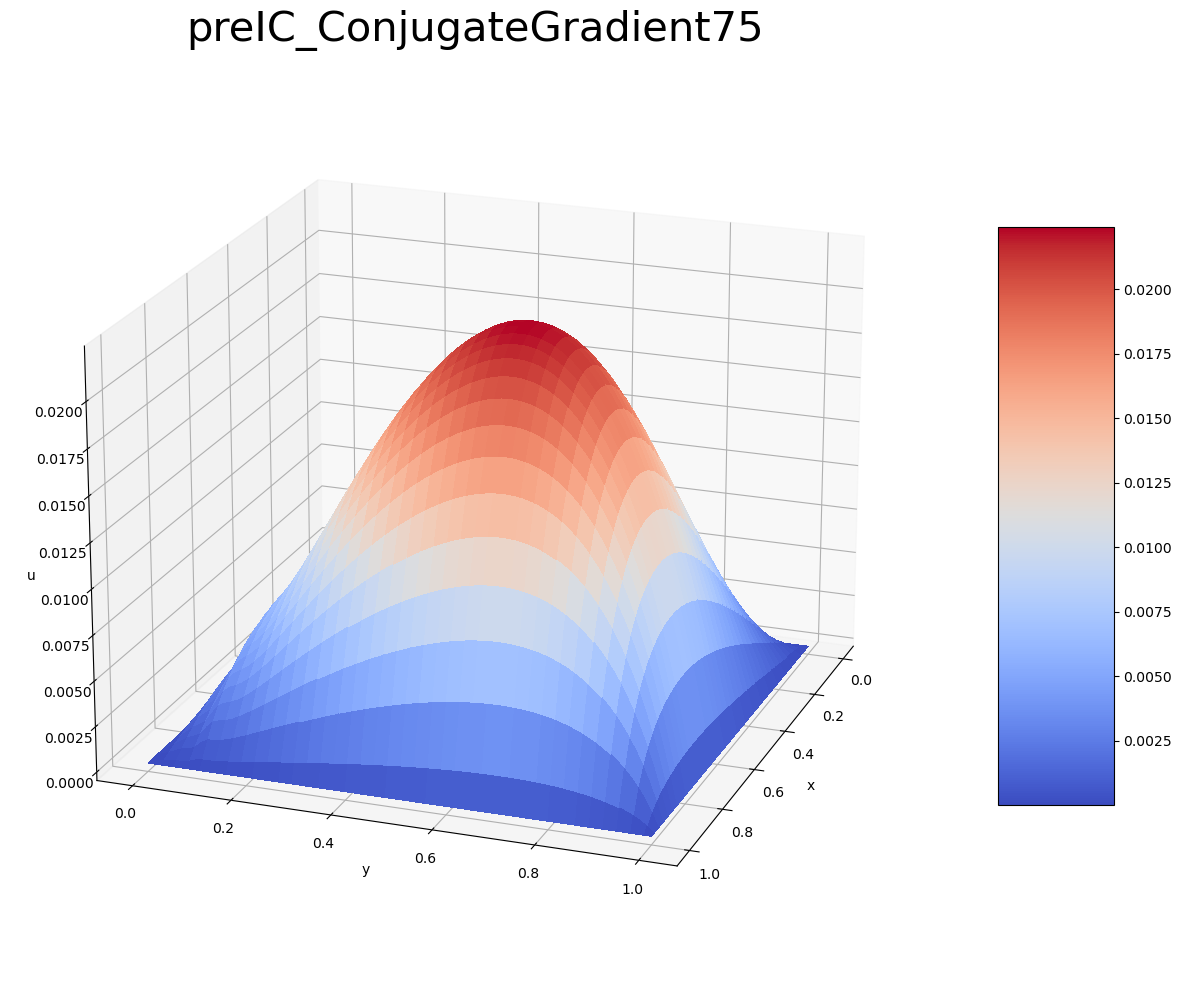

In [16]:
#Problem(1) is solved at above code (poisson2, poisson3 functions)
#Problem(2)
poisson2("preIC_ConjugateGradient",75,100,1e-10)

Iteration Status: 100 , Residual Status: 3.055358907888E+01
Maximum iteration has achieved, without achieving the intended convergence, Residual Status: 3.055358907888E+01
Time taken to solve the preIC_ConjugateGradient100 system is 1355.1600069999695 seconds


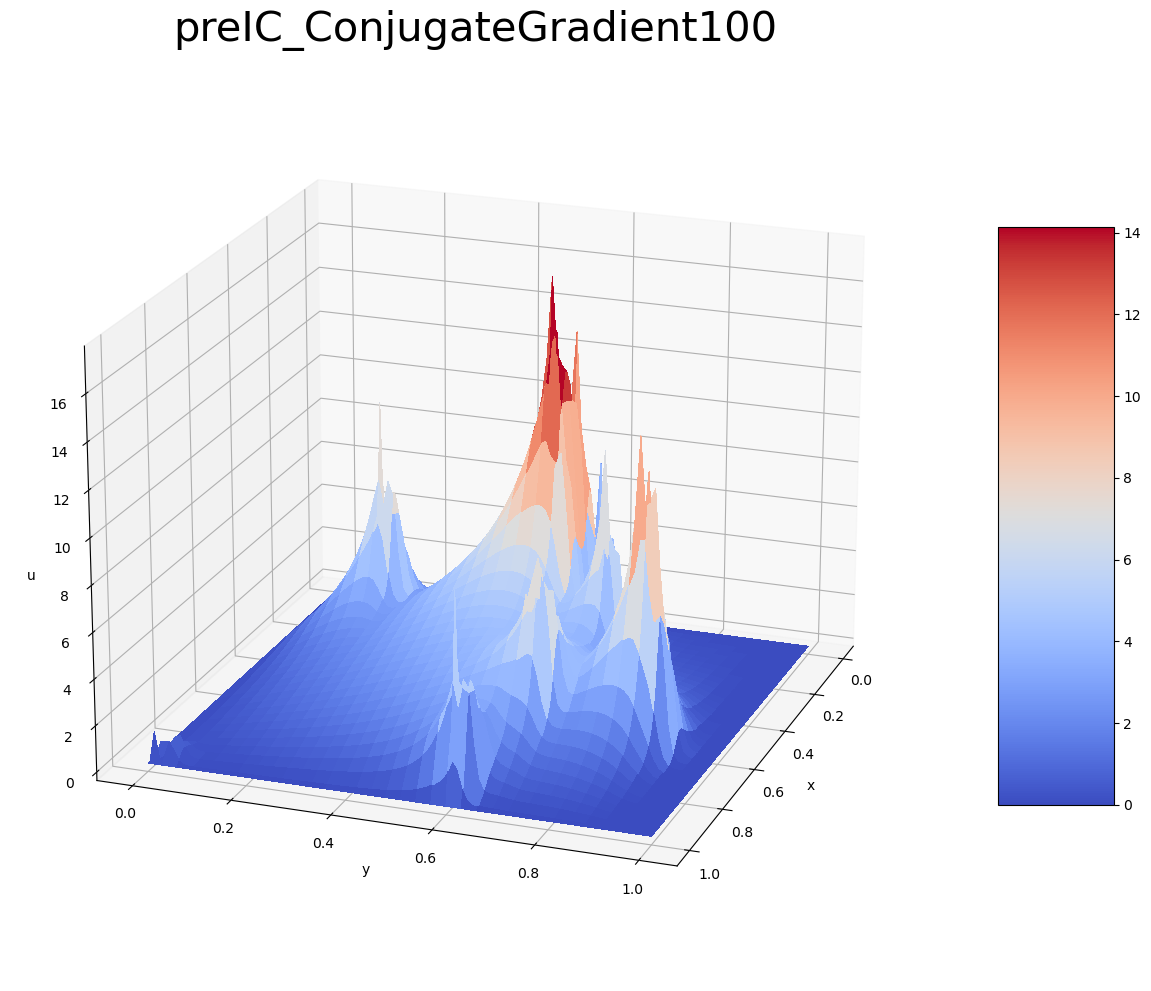

In [20]:
#Problem(3)
poisson3("preIC_ConjugateGradient",100,100,1e-10)